Bước 1: Understanding df

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


from mpl_toolkits.mplot3d import Axes3D

file_path = '../../data/raw/greenhouse_gas_inventory_data_completed.csv'
df = pd.read_csv(file_path)


In [2]:
# Bước 1: Lấy số lượng hàng và cột
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")  # In ra số lượng hàng
print(f"Number of columns: {num_columns}")  # In ra số lượng cột

Number of rows: 8406
Number of columns: 5


In [3]:
# Bước 2: Lấy thông tin cột: tên cột, kiểu dữ liệu, và số lượng giá trị duy nhất
# Tạo dfFrame với tên cột và kiểu dữ liệu
column_info = df.dtypes.to_frame(name='Data Type').join(df.nunique().to_frame(name='Unique Values'))
print(column_info)  # In ra thông tin chi tiết của các cột

                Data Type  Unique Values
country_or_area    object             43
continent          object              5
year                int64             25
value             float64           7659
category           object             10


In [4]:
# Bước 3: Xác định và phân loại kiểu dữ liệu của các cột data.
def classify_column(col_name, data_type, unique_values):
    # nếu type data là object, thì sẽ là Categorical
    if data_type == 'object':
        return 'Categorical'
    # nếu type data là float64 và int64 thì sẽ phải qua thêm 1 bước để kiểm tra về mặt số học.
    # nếu value duy nhất < 5% trên tổng số hàng thì nó sẽ là Categorical, còn lại thì sẽ là Numerical.
    elif data_type in ['int64', 'float64']:
        if unique_values < 0.05 * num_rows:
            return 'Categorical'
        else:
            return 'Numerical'
    else:
        return 'Categorical'

column_info['Category'] = column_info.apply(lambda row: classify_column(row.name, row['Data Type'], row['Unique Values']), axis=1)

column_info.reset_index(inplace=True)
column_info.columns = ['Column Name', 'Data Type', 'Unique Values', 'Category']

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(column_info)


Number of rows: 8406
Number of columns: 5
       Column Name Data Type  Unique Values     Category
0  country_or_area    object             43  Categorical
1        continent    object              5  Categorical
2             year     int64             25  Categorical
3            value   float64           7659    Numerical
4         category    object             10  Categorical


In [38]:
df = df.rename(columns={'country_or_area':'Country',
                   'continent':'Continent',
                   'year':'Year',
                   'value':'Value',
                   'category':'Category'})
df

,Country,Continent,Year,Value,Category
0,Australia,Oceania,2014,393126.947000,CO2 Emissions
1,Australia,Oceania,2013,396913.936500,CO2 Emissions
2,Australia,Oceania,2012,406462.847700,CO2 Emissions
3,Australia,Oceania,2011,403705.528300,CO2 Emissions
4,Australia,Oceania,2010,406200.993200,CO2 Emissions
...,...,...,...,...,...
8401,United States of America,North America,1994,593.222570,Mixed HFCs and PFCs Emissions
8402,United States of America,North America,1993,586.939752,Mixed HFCs and PFCs Emissions
8403,United States of America,North America,1992,574.414624,Mixed HFCs and PFCs Emissions
8404,United States of America,North America,1991,566.900968,Mixed HFCs and PFCs Emissions


In [6]:
df.isna().sum()

Country      0
Continent    0
Year         0
Value        0
Category     0
dtype: int64

In [7]:
df.columns

Index(['Country', 'Continent', 'Year', 'Value', 'Category'], dtype='object')

Bước 2: Exploring Data (EDA)

1. Dùng Histogram + Box Plot để so sánh value khí thải giữa các continent.

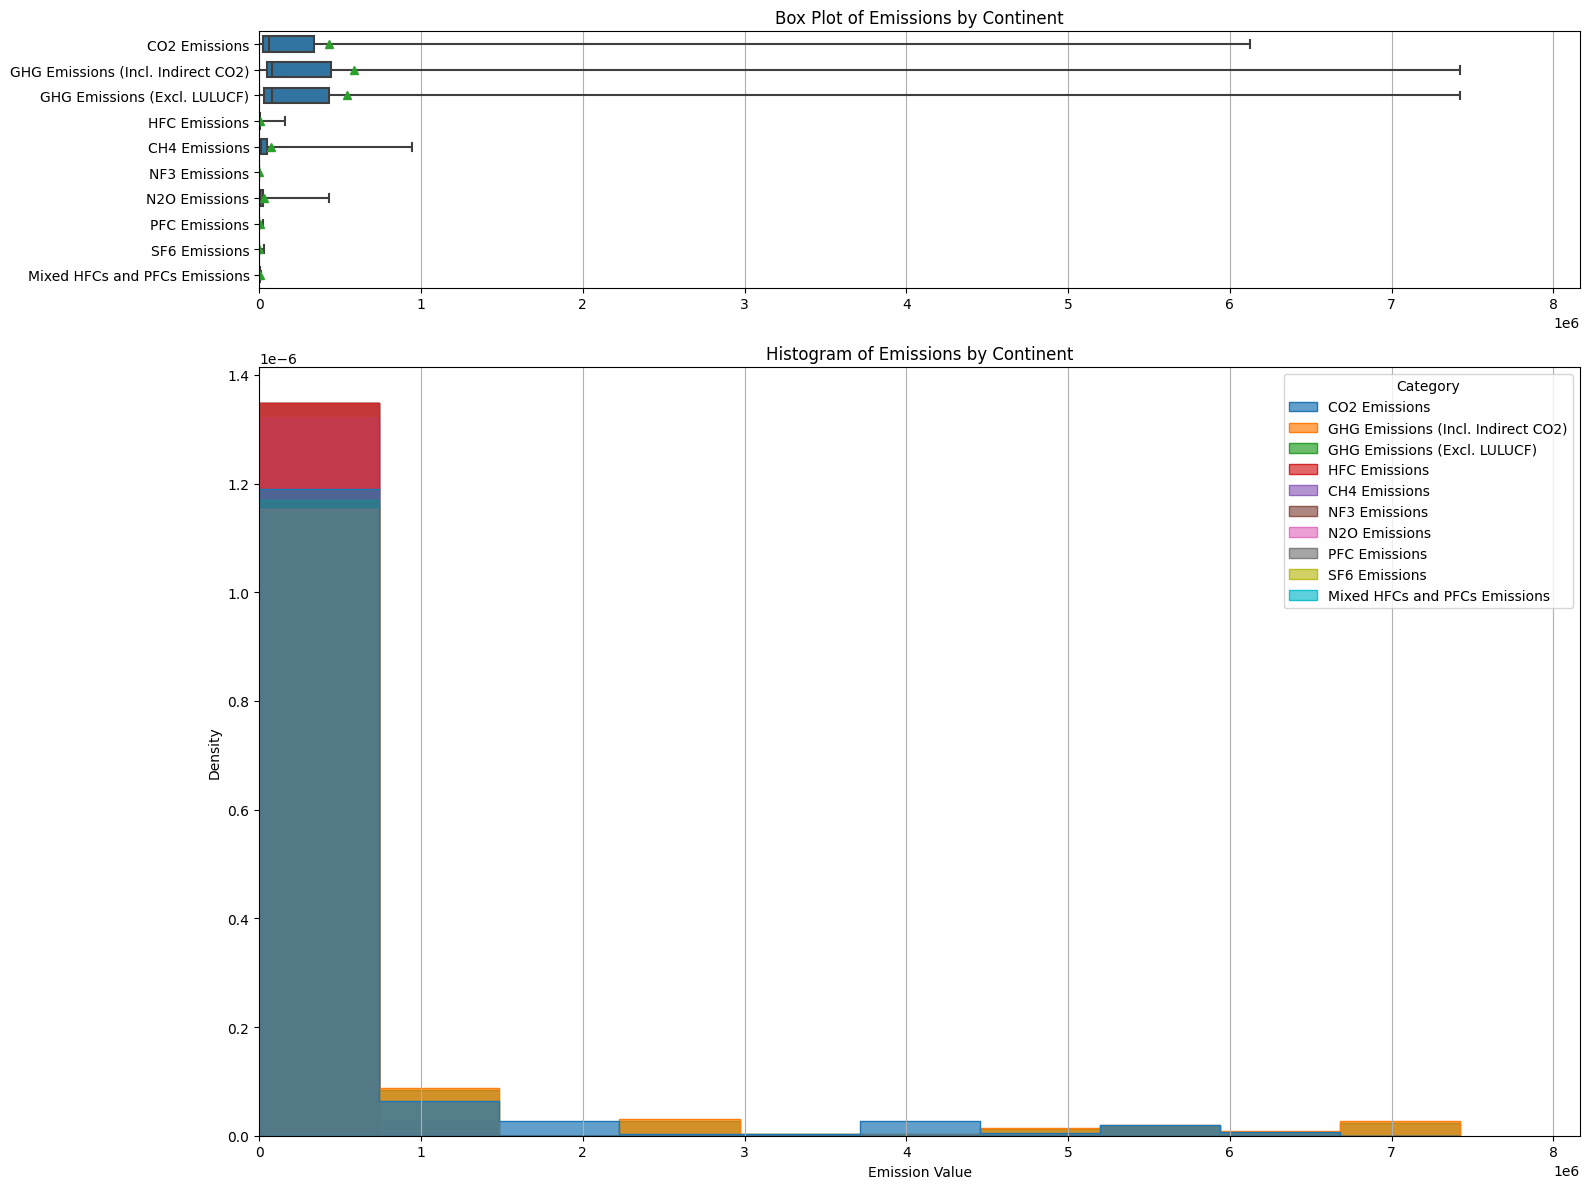

In [8]:
# Set up the matplotlib figure with increased height
plt.figure(figsize=(16, 12))

# Create GridSpec with adjusted height ratios for more spacing
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])  # Less space for boxplot, more for histogram

# Box Plot Enhancements
ax0 = plt.subplot(gs[0])
sns.boxplot(x='Value', y='Category', data=df, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, showmeans=True)  # Add means to boxplot
ax0.set_title('Box Plot of Emissions by Continent')
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.xaxis.grid(True)  # Add gridlines to x-axis for better readability
ax0.set_xlim(0, df['Value'].max() * 1.1)  # Adjust x-axis limits for better spacing

# Histogram Enhancements
ax1 = plt.subplot(gs[1])
sns.histplot(data=df, x='Value', hue='Category', element='step', stat='density', common_norm=False, bins=10, ax=ax1, alpha=0.7)  # Adjust alpha for transparency
ax1.set_title('Histogram of Emissions by Continent')
ax1.set_xlabel('Emission Value')
ax1.set_ylabel('Density')
ax1.xaxis.grid(True)  # Add gridlines to x-axis
ax1.set_xlim(0, df['Value'].max() * 1.1)  # Align x-axis limits with boxplot

plt.tight_layout()
plt.show()

In [9]:
df.groupby(['Category'])['Value'].mean()

Category
CH4 Emissions                          73302.713115
CO2 Emissions                         432048.827609
GHG Emissions (Excl. LULUCF)          544868.261815
GHG Emissions (Incl. Indirect CO2)    587410.605151
HFC Emissions                           7459.376347
Mixed HFCs and PFCs Emissions           3264.532560
N2O Emissions                          29922.486724
NF3 Emissions                            113.467226
PFC Emissions                           1823.313419
SF6 Emissions                           1204.614834
Name: Value, dtype: float64

In [10]:
df.groupby(['Category']).agg({'Value':['mean','min','max']})


Value                          
                                             mean         min           max
Category                                                                   
CH4 Emissions                        73302.713115    0.849257  9.423835e+05
CO2 Emissions                       432048.827609   71.881895  6.122747e+06
GHG Emissions (Excl. LULUCF)        544868.261815   86.728296  7.422208e+06
GHG Emissions (Incl. Indirect CO2)  587410.605151   86.728296  7.422208e+06
HFC Emissions                         7459.376347    0.000072  1.572373e+05
Mixed HFCs and PFCs Emissions         3264.532560  151.948998  9.449892e+03
N2O Emissions                        29922.486724    1.645551  4.338726e+05
NF3 Emissions                          113.467226    0.055900  1.561300e+03
PFC Emissions                         1823.313419    0.000001  2.536966e+04
SF6 Emissions                         1204.614834    0.000456  3.108041e+04

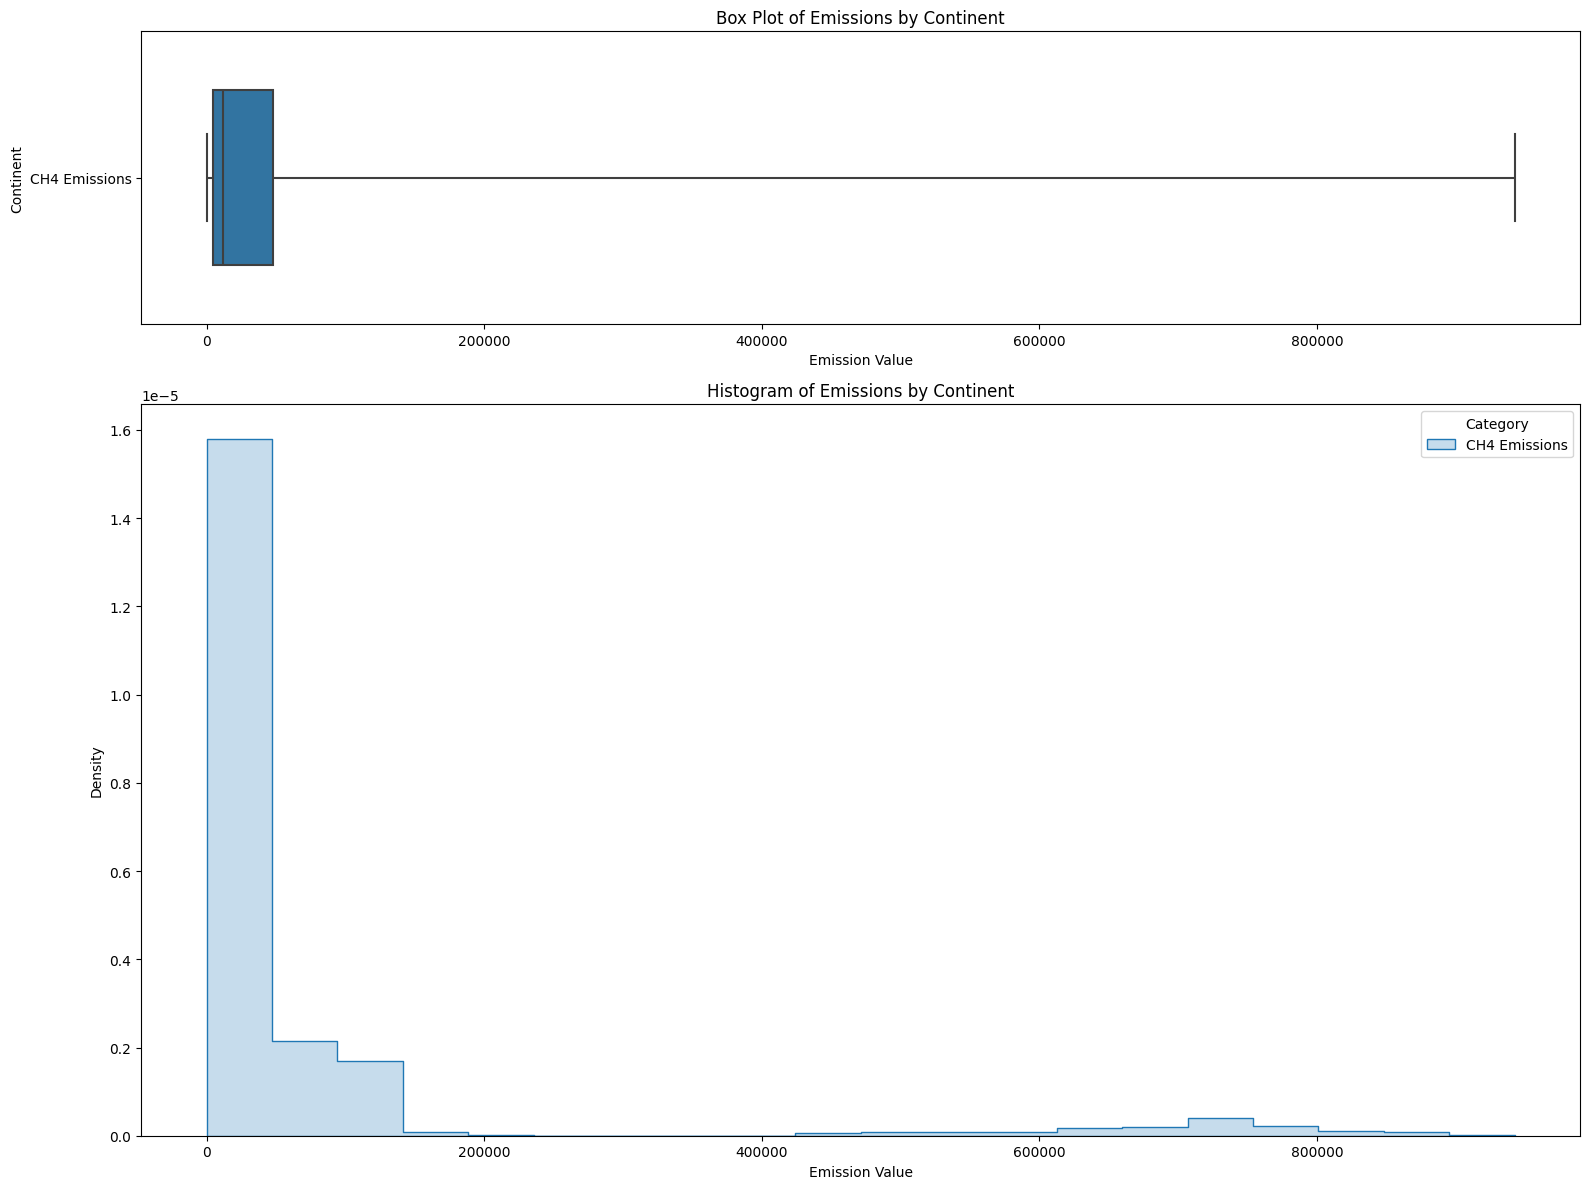

In [11]:
# Assuming 'df' is the DataFrame that you are working with

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))  # Tăng chiều cao của figure

# Lọc dữ liệu cho
df0 = df.loc[df['Category'] == 'CH4 Emissions']

# Tạo GridSpec cho bố cục biểu đồ
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5])  # Tăng khoảng cách giữa các hàng

# Box Plot ở trên cùng
ax0 = plt.subplot(gs[0])
sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5)
ax0.set_title('Box Plot of Emissions by Continent')
ax0.set_xlabel('Emission Value')
ax0.set_ylabel('Continent')

# Histogram ở dưới cùng
ax1 = plt.subplot(gs[1])
sns.histplot(data=df0, x='Value', hue='Category', element='step', stat='density', common_norm=False, bins=20, ax=ax1)
ax1.set_title('Histogram of Emissions by Continent')
ax1.set_xlabel('Emission Value')
ax1.set_ylabel('Density')

plt.tight_layout()
plt.show()


C:\Users\VincentPham\AppData\Local\Temp\ipykernel_14136\2171995280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)


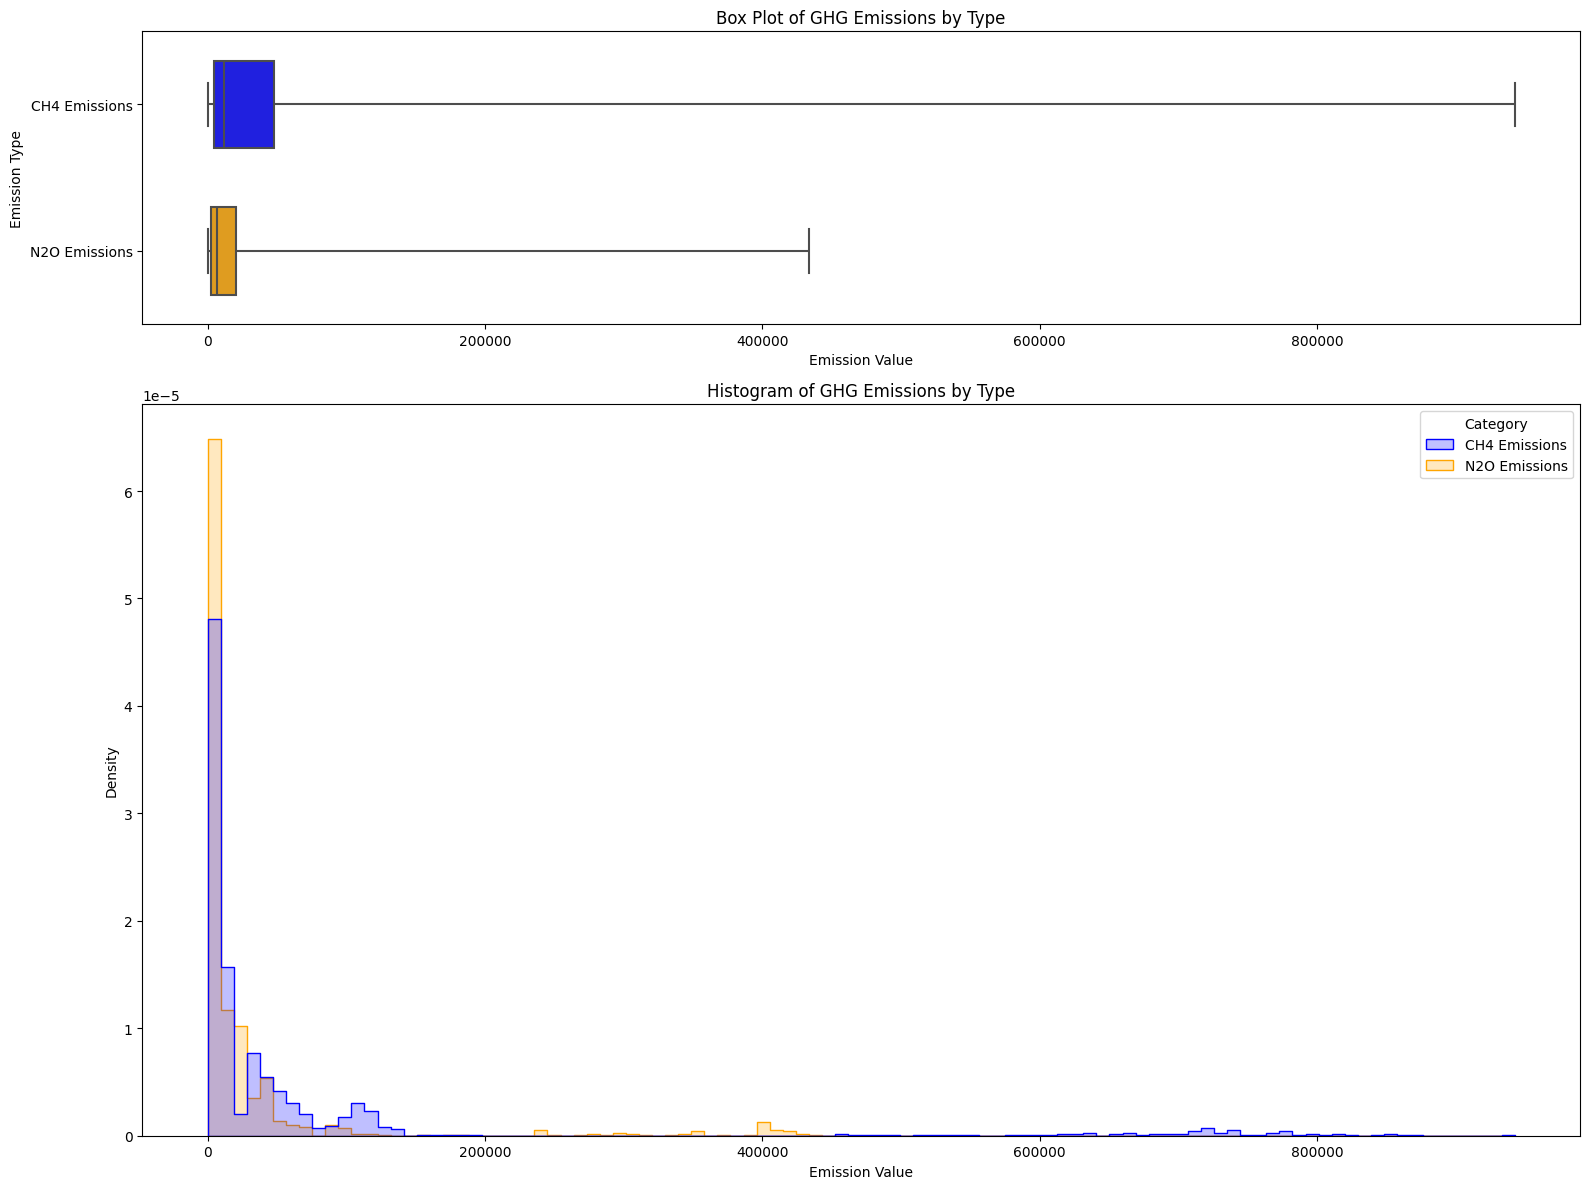

In [12]:
# Custom color palette for better distinction
palette = {'CH4 Emissions': 'blue', 
           'N2O Emissions': 'orange'}  # Fix typo here

# Filter data for CH4 and N2O emissions
df0 = df[df['Category'].isin(['CH4 Emissions', 'N2O Emissions'])]  # Fix typo here

# Assuming 'df' is the DataFrame that you are working with
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))  # Tăng chiều cao của figure

# Lọc dữ liệu cho 3 loại khí nhà kính

# Tạo GridSpec cho bố cục biểu đồ
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5])  # Tăng khoảng cách giữa các hàng

# Box Plot ở trên cùng
ax0 = plt.subplot(gs[0])
sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)
ax0.set_title('Box Plot of GHG Emissions by Type')
ax0.set_xlabel('Emission Value')
ax0.set_ylabel('Emission Type')

# Histogram ở dưới cùng
ax1 = plt.subplot(gs[1])
sns.histplot(data=df0, x='Value', hue='Category', element='step', stat='density', common_norm=False, bins=100, ax=ax1, palette=palette)
ax1.set_title('Histogram of GHG Emissions by Type')
ax1.set_xlabel('Emission Value')
ax1.set_ylabel('Density')

plt.tight_layout()
plt.show()


C:\Users\VincentPham\AppData\Local\Temp\ipykernel_14136\4162536514.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)


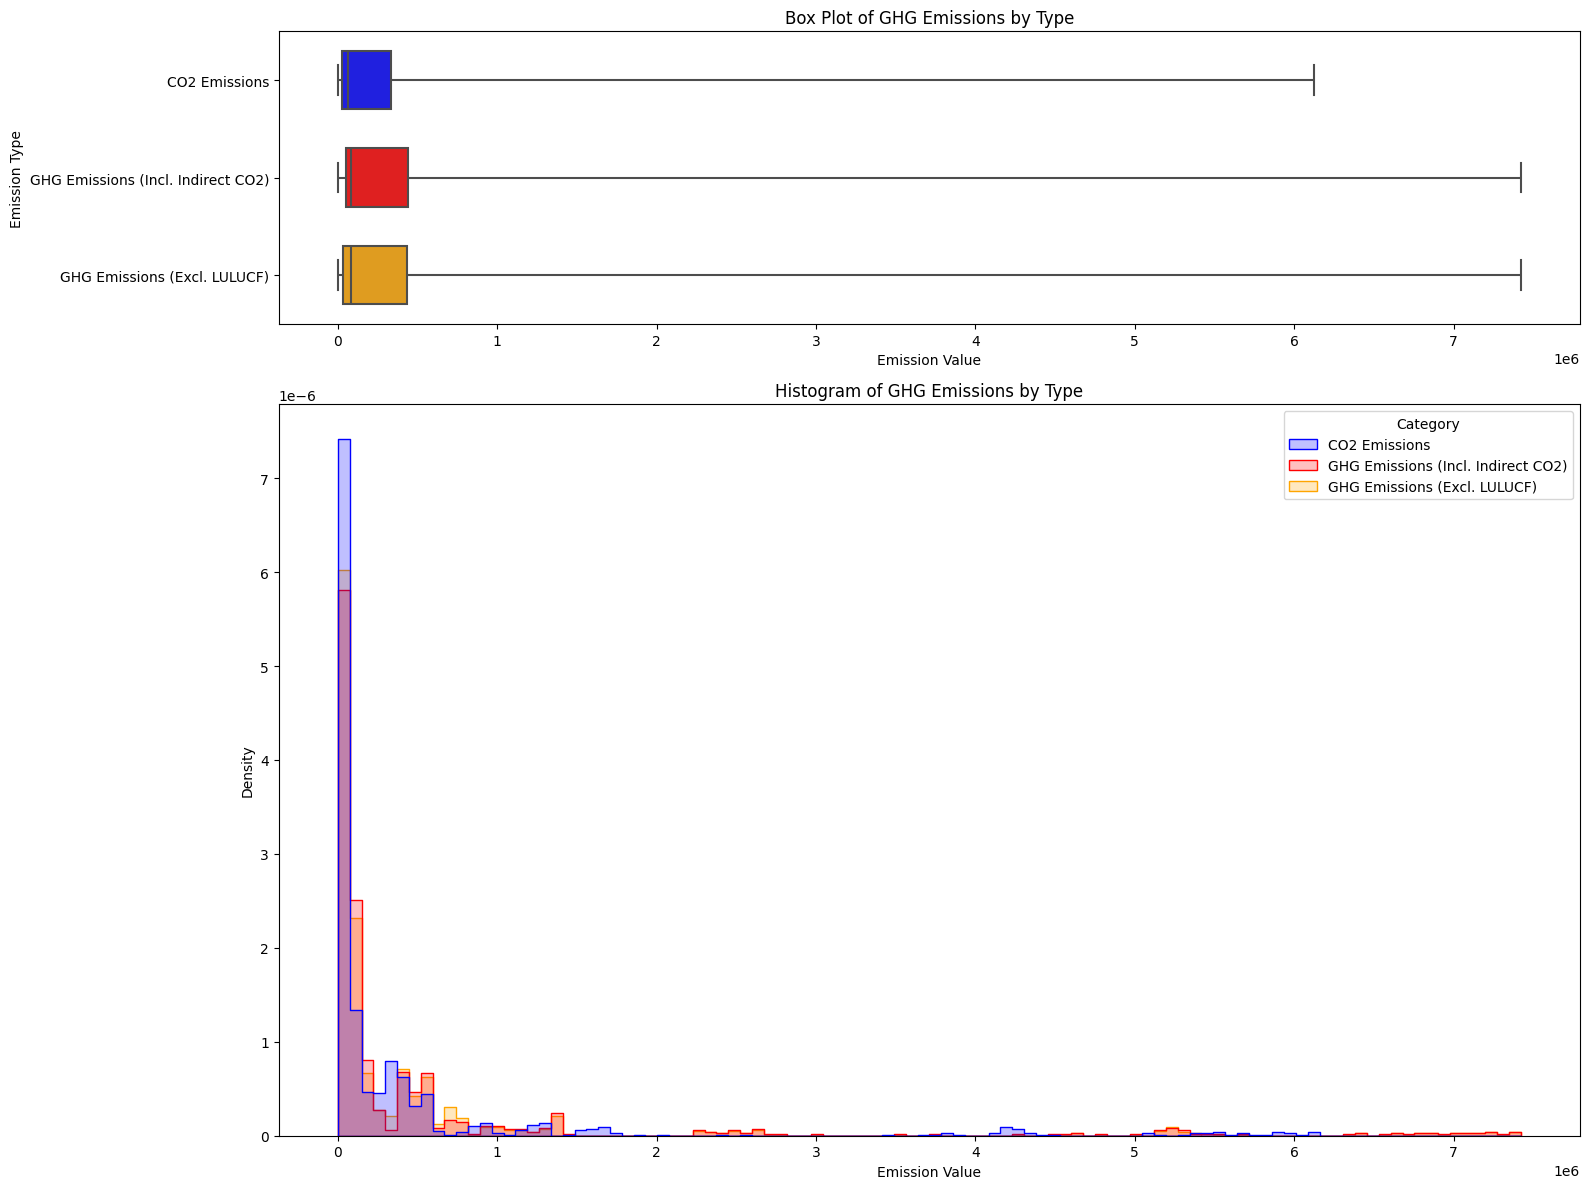

In [13]:
# Custom color palette for better distinction
palette = {'CO2 Emissions': 'blue', 
           'GHG Emissions (Excl. LULUCF)': 'orange', 
           'GHG Emissions (Incl. Indirect CO2)': 'red'}

# Assuming 'df' is the DataFrame that you are working with
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))  # Tăng chiều cao của figure

# Lọc dữ liệu cho 3 loại khí nhà kính
df0 = df[df['Category'].isin(['CO2 Emissions', 'GHG Emissions (Excl. LULUCF)', 'GHG Emissions (Incl. Indirect CO2)'])]

# Tạo GridSpec cho bố cục biểu đồ
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5])  # Tăng khoảng cách giữa các hàng

# Box Plot ở trên cùng
ax0 = plt.subplot(gs[0])
sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)
ax0.set_title('Box Plot of GHG Emissions by Type')
ax0.set_xlabel('Emission Value')
ax0.set_ylabel('Emission Type')

# Histogram ở dưới cùng
ax1 = plt.subplot(gs[1])
sns.histplot(data=df0, x='Value', hue='Category', element='step', stat='density', common_norm=False, bins=100, ax=ax1, palette=palette)
ax1.set_title('Histogram of GHG Emissions by Type')
ax1.set_xlabel('Emission Value')
ax1.set_ylabel('Density')

plt.tight_layout()
plt.show()


C:\Users\VincentPham\AppData\Local\Temp\ipykernel_14136\824653567.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)


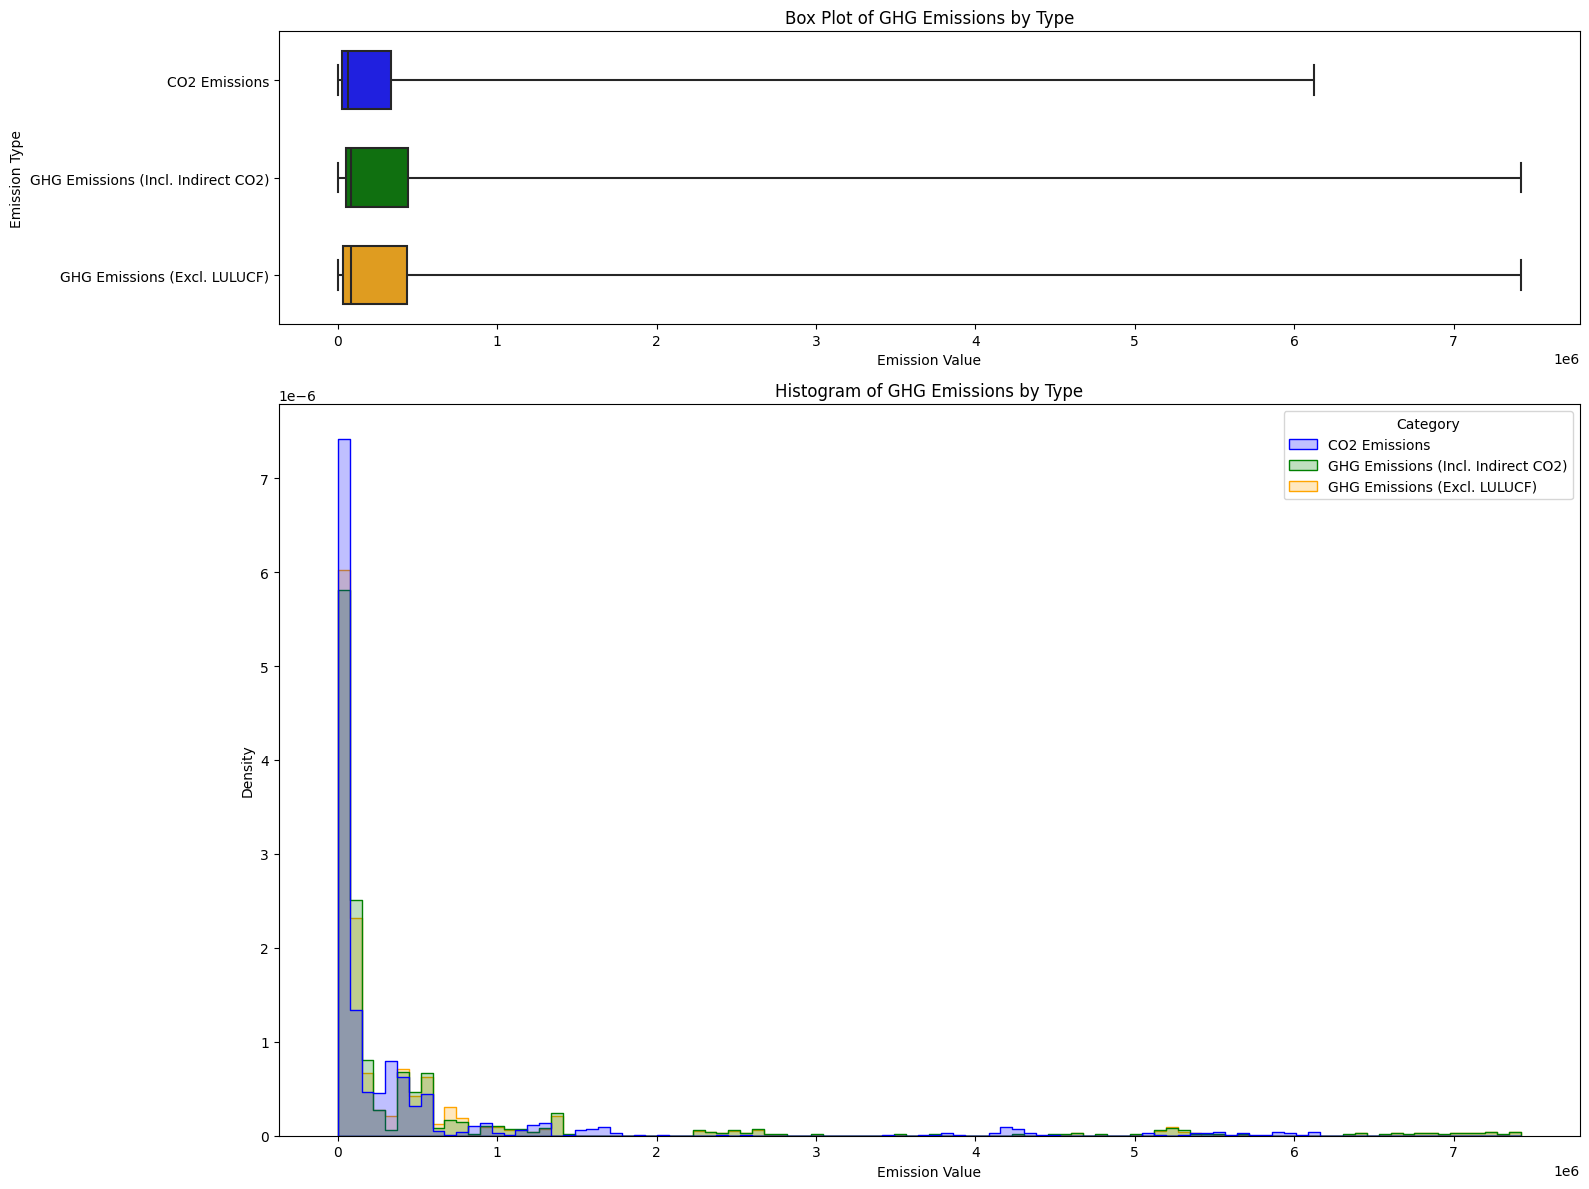

In [14]:
# Custom color palette for better distinction
palette = {'CO2 Emissions': 'blue', 
           'GHG Emissions (Excl. LULUCF)': 'orange', 
           'GHG Emissions (Incl. Indirect CO2)': 'green'}

# Assuming 'df' is the DataFrame that you are working with
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))  # Tăng chiều cao của figure

# Lọc dữ liệu cho 3 loại khí nhà kính
df0 = df[df['Category'].isin(['CO2 Emissions', 'GHG Emissions (Excl. LULUCF)', 'GHG Emissions (Incl. Indirect CO2)'])]

# Tạo GridSpec cho bố cục biểu đồ
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 5])  # Tăng khoảng cách giữa các hàng

# Box Plot ở trên cùng
ax0 = plt.subplot(gs[0])
sns.boxplot(x='Value', y='Category', data=df0, whis=[0, 100], width=0.6, orient='h', ax=ax0, linewidth=1.5, palette=palette)
ax0.set_title('Box Plot of GHG Emissions by Type')
ax0.set_xlabel('Emission Value')
ax0.set_ylabel('Emission Type')

# Histogram ở dưới cùng
ax1 = plt.subplot(gs[1])
sns.histplot(data=df0, x='Value', hue='Category', element='step', stat='density', common_norm=False, bins=100, ax=ax1, palette=palette)
ax1.set_title('Histogram of GHG Emissions by Type')
ax1.set_xlabel('Emission Value')
ax1.set_ylabel('Density')

plt.tight_layout()
plt.show()


Em dùng Histogram bởi vì nó sẽ giúp hiểu được khoảng phân phối của các value khí thải trong dfset, và giúp phát hiện các giá trị bất thường và sự phân bố tổng thể.

Kích thước: em đặt là chiều rộng 10, chiều cao là 6 (inch).
bins = 100 : chia df thành 100 khoảng = nhau.
kde = true: hiển thị đường cong màu xanh để biểu diễn phân phối df.
Label cho trục x là "Emissions Value".
Label cho trục y là "Frequency".

=> Biểu đồ histogram cho thấy phần lớn giá trị khí thải tập trung vào một phạm vi, với các giá trị ngoại lệ nằm ngoài phạm vi này, phản ánh sự phân bố không đồng đều của dữ liệu.


3. Dùng Line Plot để thấy được xu hướng thay đổi khí thải theo thời gian.

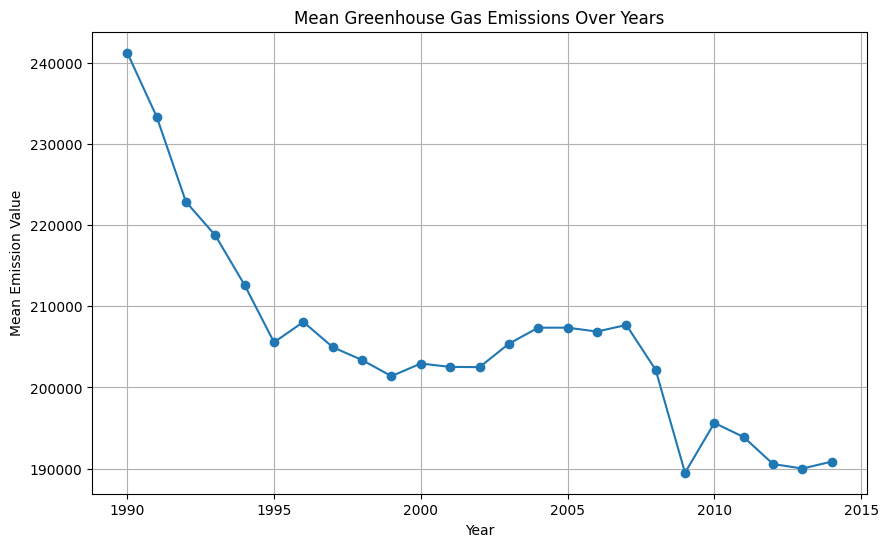

In [15]:
# Recalculate the mean emissions per year for all categories

mean_per_year = df.groupby('Year')['Value'].mean().reset_index()

# Plot the time series data to visualize the changes over the years
plt.figure(figsize=(10, 6))
plt.plot(mean_per_year['Year'], mean_per_year['Value'], marker='o')
plt.title('Mean Greenhouse Gas Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.grid(True)
plt.show()


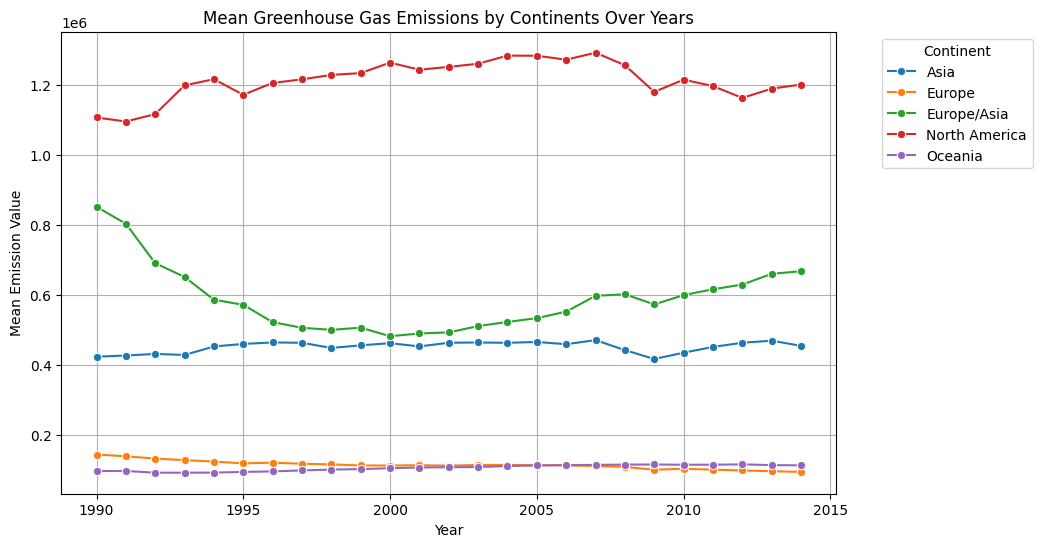

In [16]:
mean_emissions_per_year_continent = df.groupby(['Continent', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Continent', data=mean_emissions_per_year_continent, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Continents Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

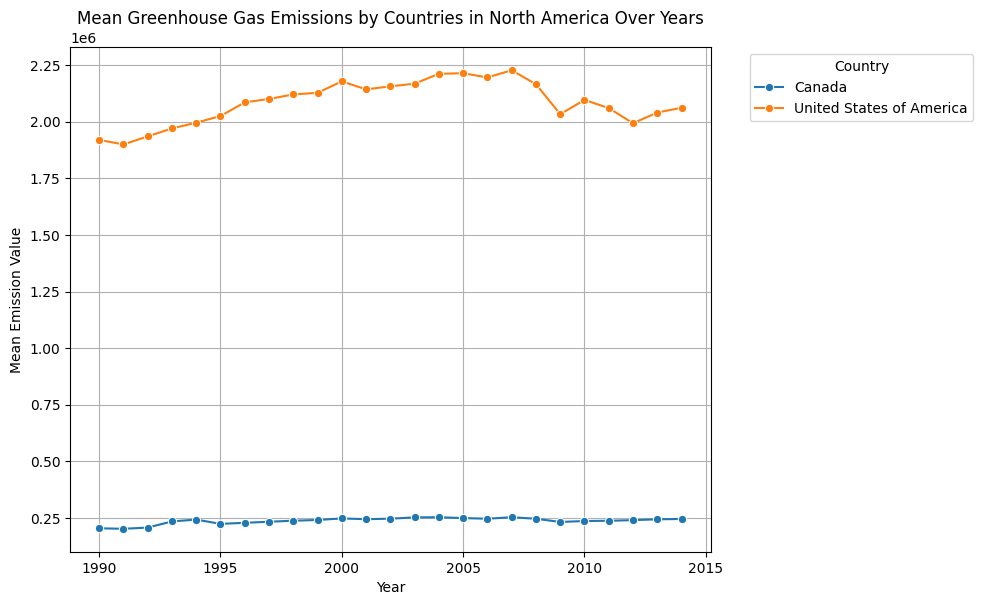

In [17]:
# Filter the data for countries within North America
north_america_data = df[df['Continent'] == 'North America']

# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:

# Filter data for North America
north_america_data = df[df['Continent'] == 'North America']

# Group by Country and Year to get the min and max emissions for each country
min_max_emissions_per_country = north_america_data.groupby('Country')['Value'].agg(['mean','min', 'max']).reset_index()

min_max_emissions_per_country

,Country,mean,min,max
0,Canada,2.376913e+05,0.151045,7.696912e+05
1,United States of America,2.084439e+06,47.921576,7.422208e+06


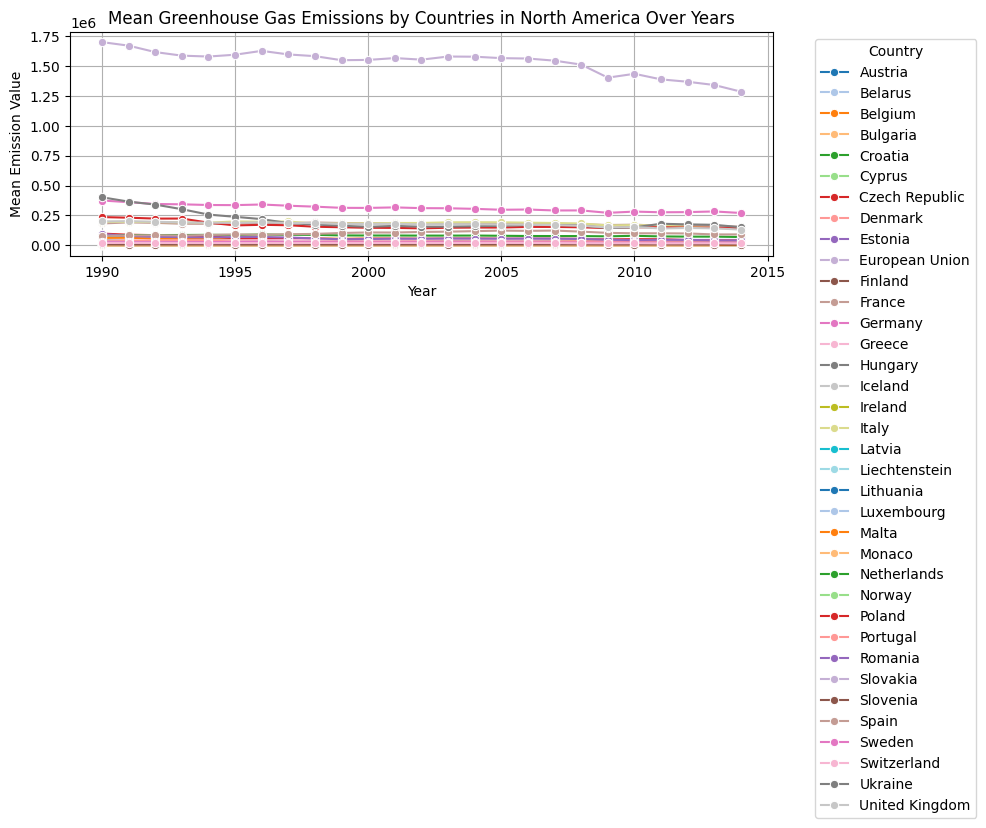

In [19]:
# Filter the data for countries within North America
north_america_data = df[df['Continent'] == 'Europe']

# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o',palette='tab20')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


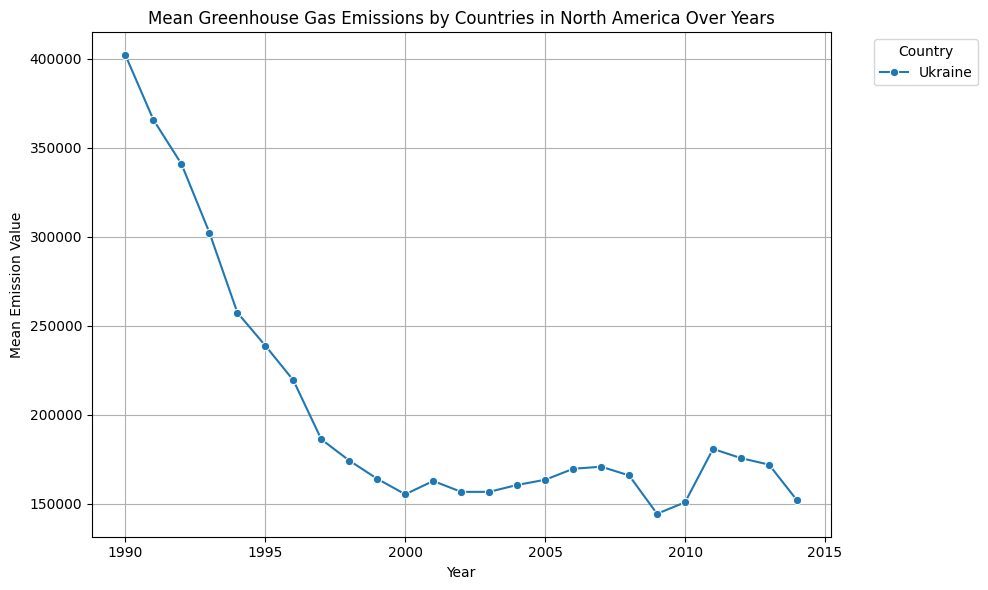

In [20]:
# Filter the data for countries within North America
north_america_data = df[(df['Continent'] == 'Europe') & (df['Country'] == 'Ukraine')]


# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


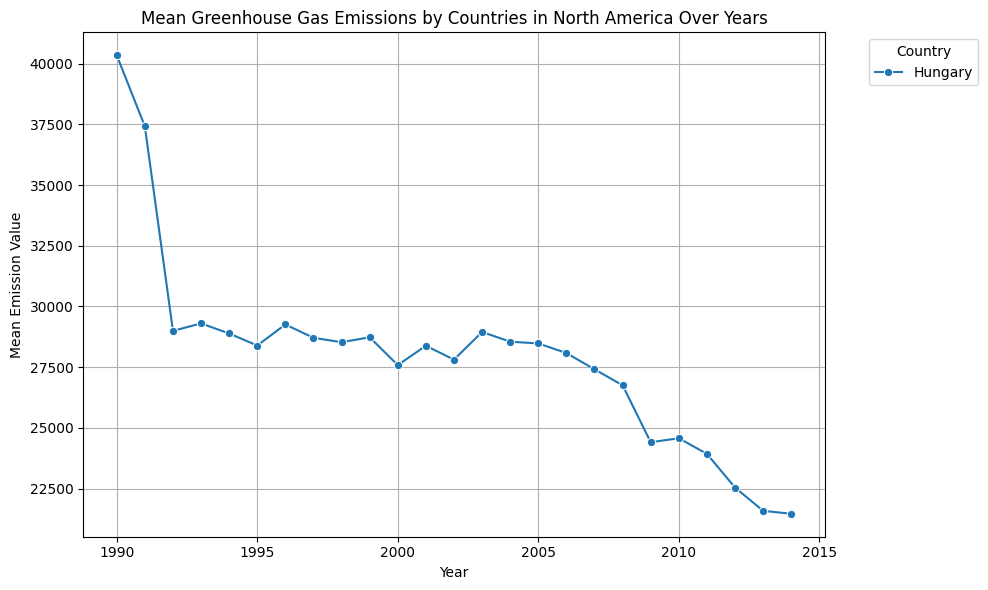

In [21]:
# Filter the data for countries within North America
north_america_data = df[(df['Continent'] == 'Europe') & (df['Country'] == 'Hungary')]


# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


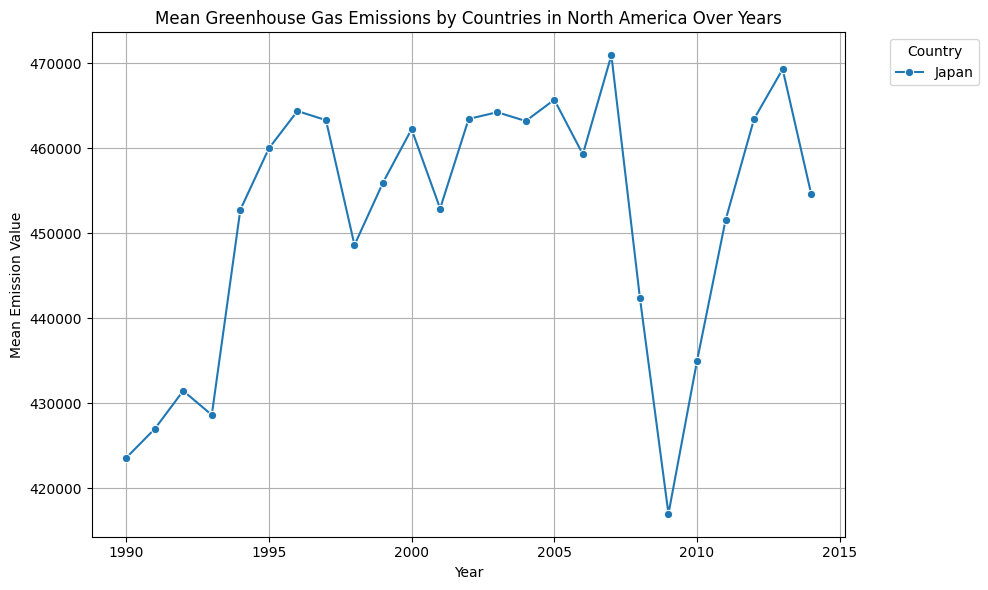

In [22]:
# Filter the data for countries within North America
north_america_data = df[df['Continent'] == 'Asia']

# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


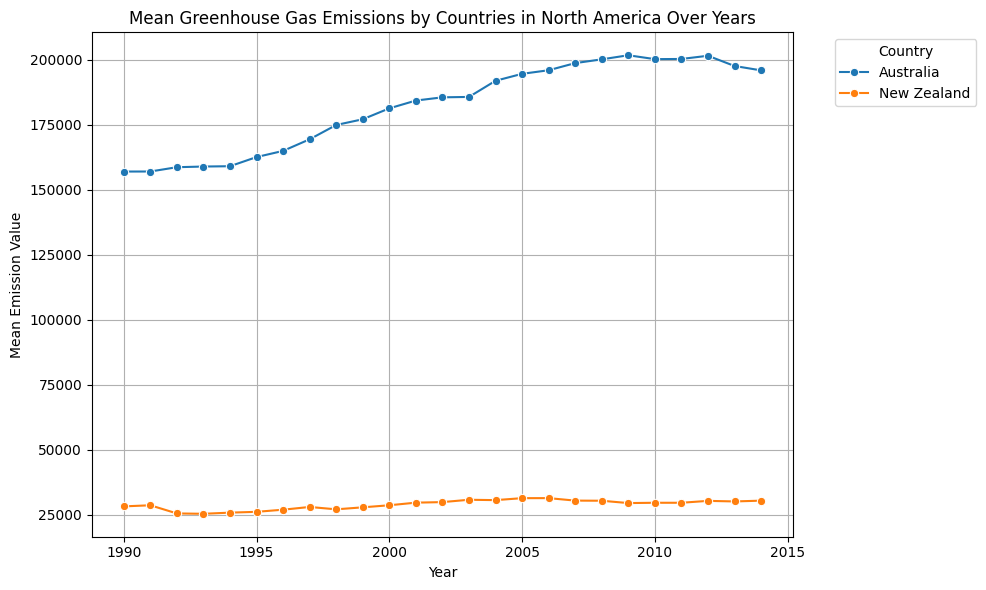

In [23]:
# Filter the data for countries within North America
north_america_data = df[df['Continent'] == 'Oceania']

# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


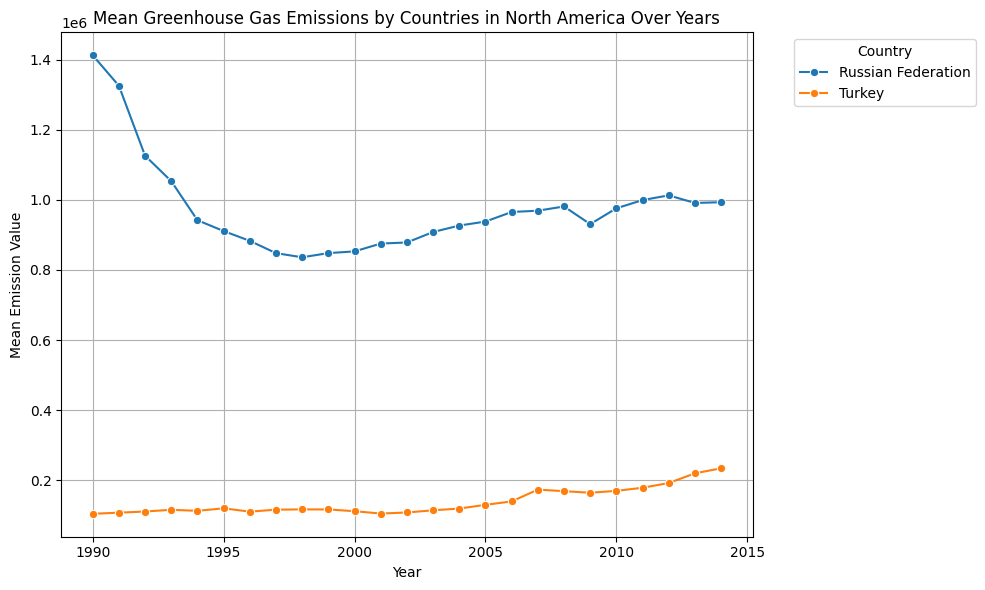

In [24]:
# Filter the data for countries within North America
north_america_data = df[df['Continent'] == 'Europe/Asia']

# Group by Country and Year to get the mean emissions for each country over the years
mean_emissions_per_year_country = north_america_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')
plt.title('Mean Greenhouse Gas Emissions by Countries in North America Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


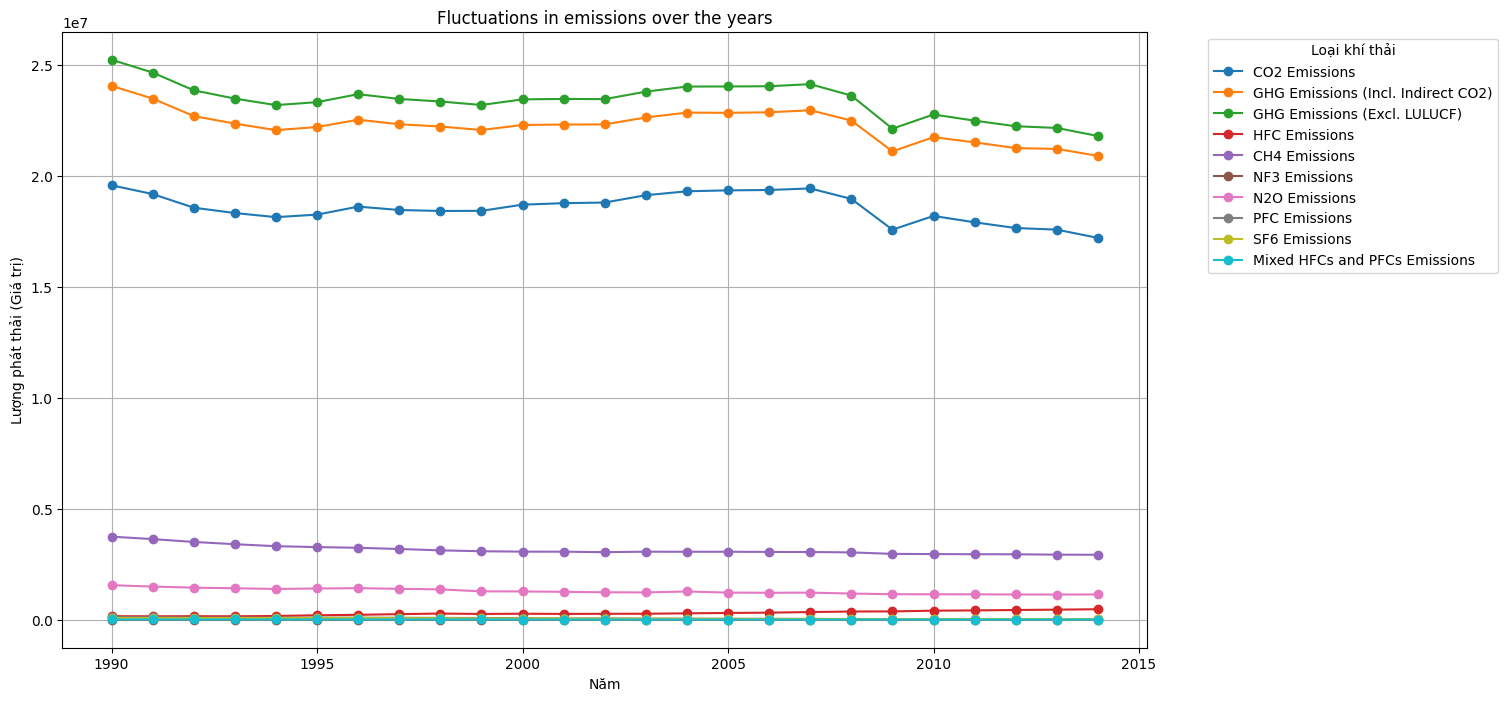

In [25]:
# Get the unique categories (make sure the column name matches exactly)
unique_categories = df['Category'].unique()

# Tổng hợp dữ liệu theo năm và loại khí thải
summary_by_year_category = df.groupby(['Year', 'Category']).agg({'Value': 'sum'}).reset_index()

# Vẽ biểu đồ line plot cho các loại khí thải
plt.figure(figsize=(14, 8))

for category in unique_categories:
    category_df = summary_by_year_category[summary_by_year_category['Category'] == category]
    plt.plot(category_df['Year'], category_df['Value'], marker='o', label=category)

plt.title('Fluctuations in emissions over the years')
plt.xlabel('Năm')
plt.ylabel('Lượng phát thải (Giá trị)')
plt.legend(title='Loại khí thải', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


còn đây là em lược bỏ và chỉ để lại top 10 country có lượng khí thải cao nhất để đỡ rối như trên.

4. Descriptive Statitics

In [26]:
# Display basic information to understand the dfset structure
df.info()

# Calculate descriptive statistics for all columns
descriptive_stats = df.describe(include='all')
descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    8406 non-null   object 
 1   Continent  8406 non-null   object 
 2   Year       8406 non-null   int64  
 3   Value      8406 non-null   float64
 4   Category   8406 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 328.5+ KB


,Country,Continent,Year,Value,Category
count,8406,8406,8406.000000,8.406000e+03,8406
unique,43,5,NaN,NaN,10
top,United States of America,Europe,NaN,NaN,CO2 Emissions
freq,250,6936,NaN,NaN,1074
mean,NaN,NaN,2002.188437,2.055472e+05,NaN
std,NaN,NaN,7.151605,8.041504e+05,NaN
min,NaN,NaN,1990.000000,1.100000e-06,NaN
25%,NaN,NaN,1996.000000,2.976980e+02,NaN
50%,NaN,NaN,2002.000000,7.840318e+03,NaN
75%,NaN,NaN,2008.000000,6.589885e+04,NaN


In [27]:
descriptive_stats = df['Value'].describe(percentiles=[.25, .5, .75]).to_frame(name='Statistics')
print(descriptive_stats)

         Statistics
count  8.406000e+03
mean   2.055472e+05
std    8.041504e+05
min    1.100000e-06
25%    2.976980e+02
50%    7.840318e+03
75%    6.589885e+04
max    7.422208e+06


Descriptive Statistics: Tính toán các thống kê cơ bản như mean, median, standard deviation, min, max, và percentiles (25%, 50%, va 75%).

5. Matrix and Heatmap.

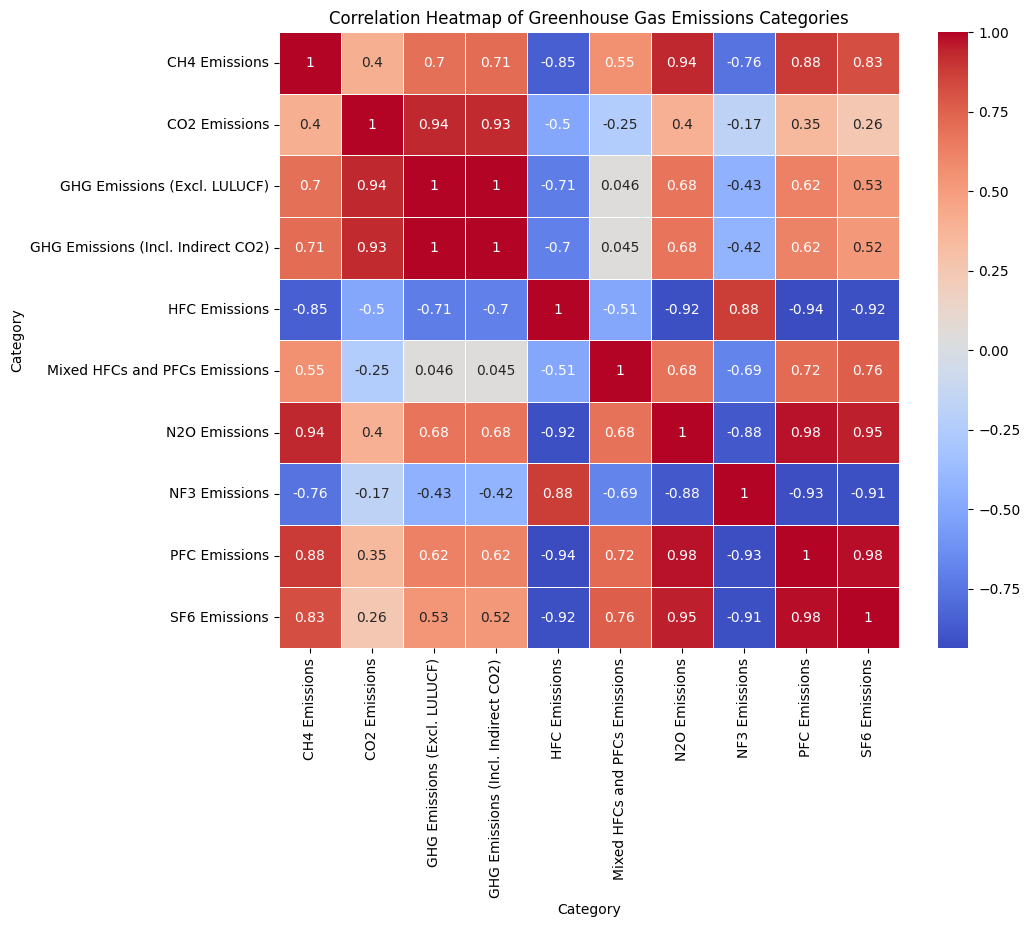

In [28]:
# Pivoting the df to create a dfframe suitable for correlation analysis
pivot_df = df.pivot_table(index='Year', columns='Category', values='Value', aggfunc='sum')

# Calculating the correlation matrix
correlation_matrix = pivot_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Greenhouse Gas Emissions Categories')
plt.show()

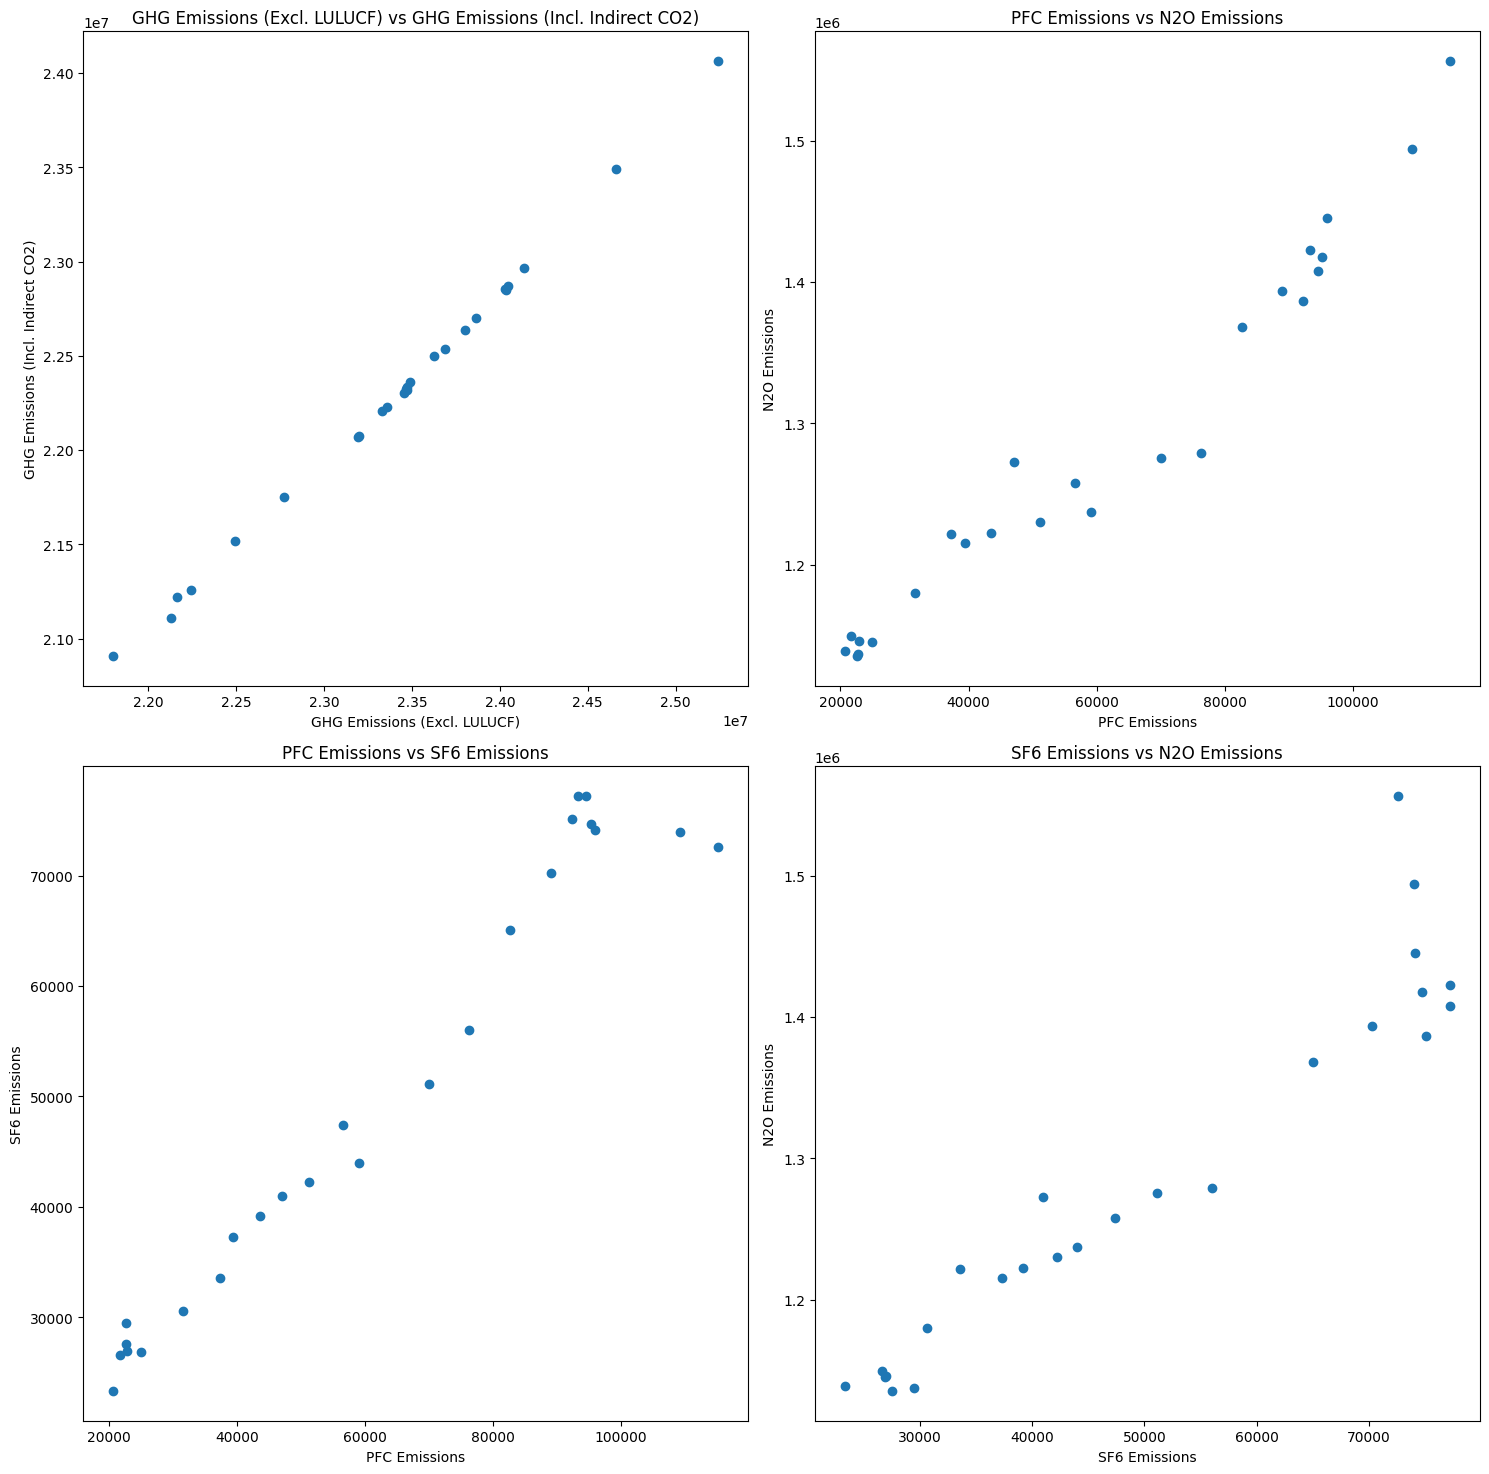

In [29]:
# Plotting scatter plots for the selected pairs

plt.figure(figsize=(15, 15))

# 1. GHG Emissions (Excl. LULUCF) vs GHG Emissions (Incl. Indirect CO2)
plt.subplot(2, 2, 1)
plt.scatter(pivot_df['GHG Emissions (Excl. LULUCF)'], pivot_df['GHG Emissions (Incl. Indirect CO2)'])
plt.title('GHG Emissions (Excl. LULUCF) vs GHG Emissions (Incl. Indirect CO2)')
plt.xlabel('GHG Emissions (Excl. LULUCF)')
plt.ylabel('GHG Emissions (Incl. Indirect CO2)')

# 2. PFC Emissions vs N2O Emissions
plt.subplot(2, 2, 2)
plt.scatter(pivot_df['PFC Emissions'], pivot_df['N2O Emissions'])
plt.title('PFC Emissions vs N2O Emissions')
plt.xlabel('PFC Emissions')
plt.ylabel('N2O Emissions')

# 3. PFC Emissions vs SF6 Emissions
plt.subplot(2, 2, 3)
plt.scatter(pivot_df['PFC Emissions'], pivot_df['SF6 Emissions'])
plt.title('PFC Emissions vs SF6 Emissions')
plt.xlabel('PFC Emissions')
plt.ylabel('SF6 Emissions')

# 4. SF6 Emissions vs N2O Emissions
plt.subplot(2, 2, 4)
plt.scatter(pivot_df['SF6 Emissions'], pivot_df['N2O Emissions'])
plt.title('SF6 Emissions vs N2O Emissions')
plt.xlabel('SF6 Emissions')
plt.ylabel('N2O Emissions')

plt.tight_layout()
plt.show()


Feature Engineering

In [30]:
# One-Hot Encoding the categorical columns
one_hot_encoded_df = pd.get_dummies(df, columns=['Country', 'Continent', 'Category'], drop_first=True)

# Display the first few rows of the one-hot encoded DataFrame
one_hot_encoded_df.head()


,Year,Value,Country_Austria,Country_Belarus,Country_Belgium,Country_Bulgaria,Country_Canada,Country_Croatia,Country_Cyprus,Country_Czech Republic,...,Continent_Oceania,Category_CO2 Emissions,Category_GHG Emissions (Excl. LULUCF),Category_GHG Emissions (Incl. Indirect CO2),Category_HFC Emissions,Category_Mixed HFCs and PFCs Emissions,Category_N2O Emissions,Category_NF3 Emissions,Category_PFC Emissions,Category_SF6 Emissions
0,2014,393126.9470,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,2013,396913.9365,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,2012,406462.8477,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,2011,403705.5283,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,2010,406200.9932,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scaling the 'Year' and 'Value' columns
one_hot_encoded_df[['Year', 'Value']] = scaler.fit_transform(one_hot_encoded_df[['Year', 'Value']])

# Display the first few rows of the scaled DataFrame
one_hot_encoded_df.head()


,Year,Value,Country_Austria,Country_Belarus,Country_Belgium,Country_Bulgaria,Country_Canada,Country_Croatia,Country_Cyprus,Country_Czech Republic,...,Continent_Oceania,Category_CO2 Emissions,Category_GHG Emissions (Excl. LULUCF),Category_GHG Emissions (Incl. Indirect CO2),Category_HFC Emissions,Category_Mixed HFCs and PFCs Emissions,Category_N2O Emissions,Category_NF3 Emissions,Category_PFC Emissions,Category_SF6 Emissions
0,1.651694,0.233278,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,1.511857,0.237988,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,1.372020,0.249863,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,1.232183,0.246434,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,1.092346,0.249538,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature matrix (X) and target variable (y)
X = one_hot_encoded_df.drop(columns=['Value'])
y = one_hot_encoded_df['Value']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.5776762282203846, 0.3904898283644399)

c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


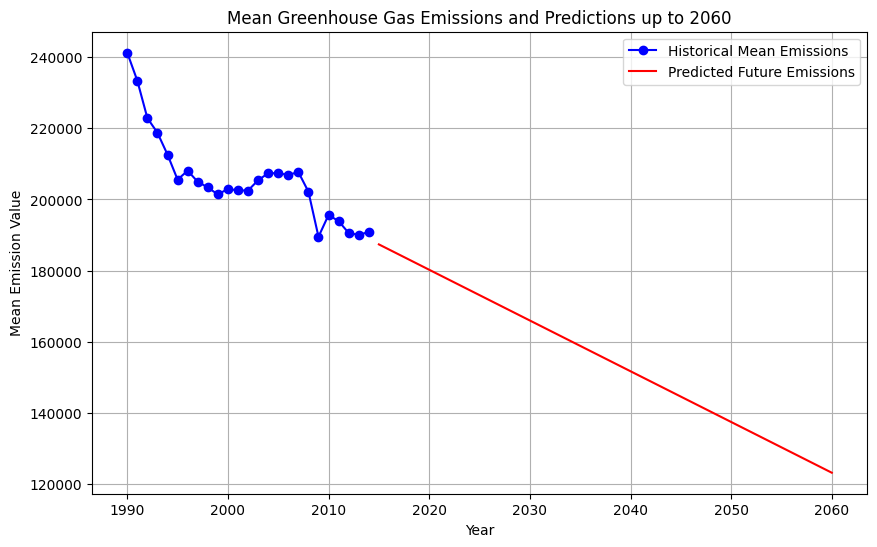

In [33]:

# Calculate the mean emissions per year
mean_emissions_per_year = df.groupby('Year')['Value'].mean().reset_index()

# Fit Linear Regression model to this aggregated data
model = LinearRegression()
model.fit(mean_emissions_per_year[['Year']], mean_emissions_per_year['Value'])

# Generate a range of future years up to 2060
future_years = np.arange(2015, 2061).reshape(-1, 1)

# Predict future emissions using the trained model
future_emissions = model.predict(future_years)

# Plotting historical and future predicted emissions
plt.figure(figsize=(10, 6))
plt.plot(mean_emissions_per_year['Year'], mean_emissions_per_year['Value'], label='Historical Mean Emissions', marker='o', linestyle='-', color='blue')
plt.plot(future_years, future_emissions, label='Predicted Future Emissions', linestyle='-', color='red')
plt.title('Mean Greenhouse Gas Emissions and Predictions up to 2060')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\VincentPham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have

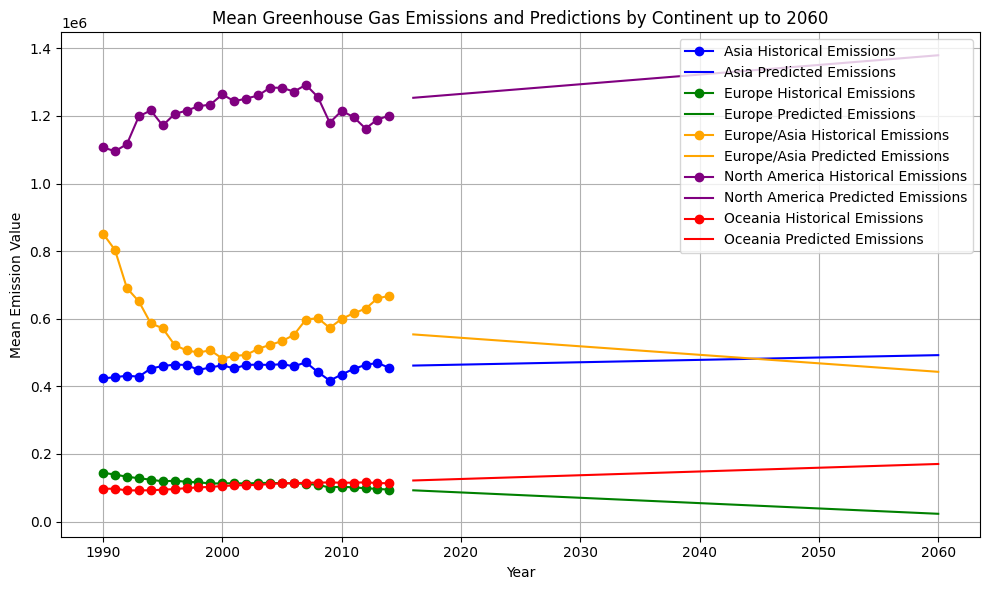

In [34]:

# Group the data by Year and Continent and calculate the mean emissions
mean_emissions_per_year_continent = df.groupby(['Year', 'Continent'])['Value'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))

# List of unique continents in the dataset
continents = mean_emissions_per_year_continent['Continent'].unique()

# Colors for each continent's plot
colors = ['blue', 'green', 'orange', 'purple', 'red', 'brown']

# Loop through each continent
for i, continent in enumerate(continents):
    # Filter the data for each continent
    continent_df = mean_emissions_per_year_continent[mean_emissions_per_year_continent['Continent'] == continent]
    
    # Fit Linear Regression model for each continent
    model = LinearRegression()
    model.fit(continent_df[['Year']], continent_df['Value'])
    
    # Generate future predictions up to 2060
    future_years = np.arange(2016, 2061).reshape(-1, 1)
    future_emissions = model.predict(future_years)
    
    # Plot historical emissions
    plt.plot(continent_df['Year'], continent_df['Value'], label=f'{continent} Historical Emissions', marker='o', linestyle='-', color=colors[i])
    
    # Plot predicted future emissions
    plt.plot(future_years, future_emissions, label=f'{continent} Predicted Emissions', linestyle='-', color=colors[i])

# Adding titles and labels
plt.title('Mean Greenhouse Gas Emissions and Predictions by Continent up to 2060')
plt.xlabel('Year')
plt.ylabel('Mean Emission Value')
plt.legend(loc='upper right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [35]:
df['Country'].nunique()

43

In [36]:
df['Country'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

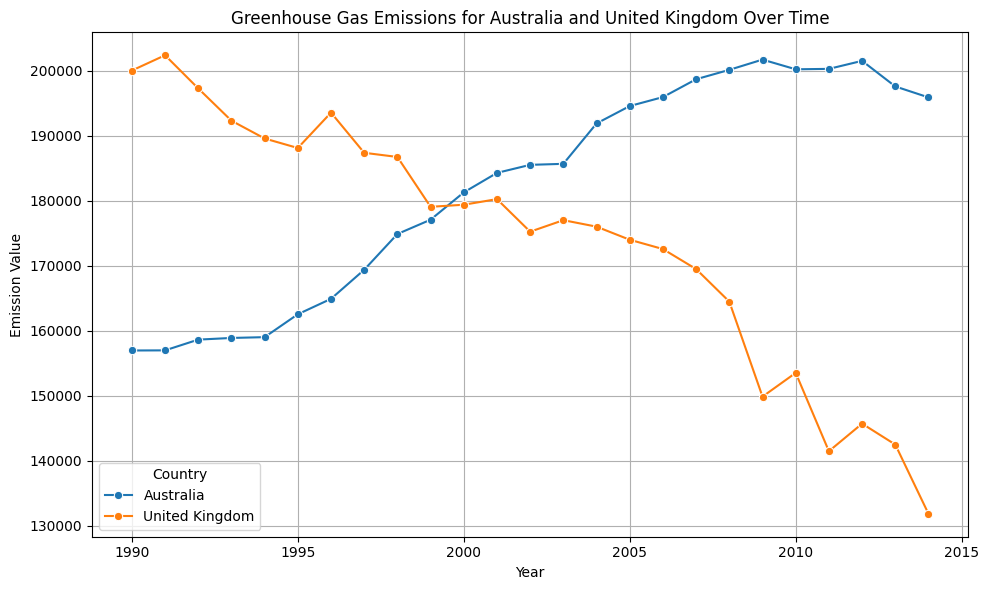

In [37]:
# Filter data for Australia and United Kingdom
countries_of_interest = df[df['Country'].isin(['Australia', 'United Kingdom'])]

# Group by Year and Country to get the mean emissions for each year
mean_emissions_per_year_country = countries_of_interest.groupby(['Year', 'Country'])['Value'].mean().reset_index()

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', hue='Country', data=mean_emissions_per_year_country, marker='o')

# Adding title and labels
plt.title('Greenhouse Gas Emissions for Australia and United Kingdom Over Time')
plt.xlabel('Year')
plt.ylabel('Emission Value')
plt.legend(title='Country')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
